<a href="https://colab.research.google.com/github/FelicianoRobles/FisicaComputacional1/blob/master/Actividad9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paquetes

In [ ]:
import numpy as np
import scipy.linalg as la
from scipy import integrate, linalg
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import math as math

# Por favor grafique en el espacio fase una familia de soluciones y determine el tipo de punto crítico de cada uno de los siguientes sistemas de ecuaciones.

In [ ]:
def Caso(A):
  print('A=\n',A,'\n')
  p=np.trace(A)
  q=la.det(A)
  d=p**2-4*q
  print("det(A)/q =",q)
  print("Traza(A)/p =",p)
  print("Delta =",d)
  eigvals, eigvecs = la.eig(A)
  print("eigvals=",eigvals)
  print("eigvecs=",eigvecs)

def Resolver2x2(A):
  p=np.trace(A)
  q=la.det(A)
  d=p**2-4*q
  eigvals, eigvecs = la.eig(A)
  t = np.linspace(0, 10,  200) # Tiempo
  c1c2 =[[1,1],[-1,-1],[1,-1],[-1,1],[1,2],[2,1]] # c1=c2
  fig=plt.figure(figsize=(5, 5))
  fig.suptitle('Espacio fase de [['+str(A[0,0])+','+str(A[0,1])+'],\n['+str(A[1,0])+','+str(A[1,1])+']]') ##################
  plt.gca().set_aspect('equal', adjustable='box')
  if d>0 or d==0: # Caso A
    if d>0:
      print("Caso A")
    if d==0:
      print("Caso B")
    eig1=eigvals[0].real
    eig2=eigvals[1].real
    for c1,c2 in c1c2:
      tx=[]
      ty=[]
      for i in t:
        x = c1*np.exp(eig1*i)*eigvecs[:,0]+c2*np.exp(eig2*i)*eigvecs[:,1]
        tx.extend([x[0]])
        ty.extend([x[1]])
      plt.plot(tx,ty,label=(c1,c2))
    plt.axvline(x=0,color='black') # Linea vertical en x = 0
    plt.axhline(y=0,color='black') # Linea horizontal en y = 0
    plt.legend()
    plt.show
  if d<0: # Caso C
    c1c2=[1,2,3,4]
    print("Se resuelve para caso C")
    B11=eigvecs[:,0].real
    B12=eigvecs[:,0].imag
    B21=eigvecs[:,1].real
    B22=eigvecs[:,1].imag
    alpha0=eigvals[0].real
    beta0=abs(eigvals[0].imag)
    alpha1=eigvals[1].real
    beta1=abs(eigvals[1].imag)
    for k in c1c2:
      for j in c1c2:
        tx=[]
        ty=[]
        for i in t:
            X=(k*(B11*np.cos(beta0*i)-B12*np.sin(beta0*i)))*math.exp(alpha0*i)+j*(B21*np.cos(beta1*i)+B22*np.sin(beta1*i))*math.exp(alpha1*i) 
            tx.extend([X[0].real])
            ty.extend([X[1].real])
        plt.plot(tx,ty)
    plt.axvline(x=0,color='black') # Linea vertical en x = 0
    plt.axhline(y=0,color='black') # Linea horizontal en y = 0
    plt.show

# Ejercicio 1.

$$\begin{eqnarray*}
\frac{d x}{d t} & = & y  \\
\frac{d y}{dt } & = & -x   \\
\end{eqnarray*}$$

$$
A=
\begin{bmatrix}
0 & 1 \\
-1 & 0 
\end{bmatrix}
$$

A=
 [[ 0  1]
 [-1  0]] 

det(A)/q = 1.0
Traza(A)/p = 0
Delta = -4.0
eigvals= [0.+1.j 0.-1.j]
eigvecs= [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j]]
Se resuelve para caso C


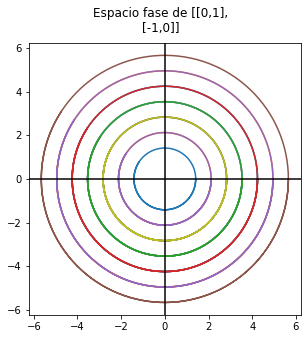

In [ ]:
A=np.array([[0,1],[-1,0]]) # Se define la matriz A
Caso(A)
Resolver2x2(A) # Se resuelve

## Ejercicio 2.

$$
\frac{d x}{d t}  =  y  \\
\frac{d y}{dt }  =   x  \\
$$

A=
 [[0 1]
 [1 0]] 

det(A)/q = -1.0
Traza(A)/p = 0
Delta = 4.0
eigvals= [ 1.+0.j -1.+0.j]
eigvecs= [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Caso A


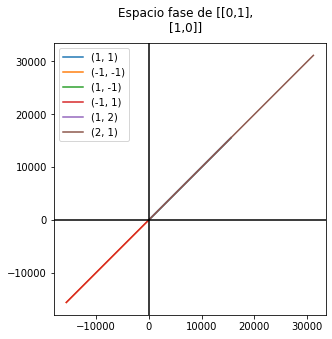

In [ ]:
A=np.array([[0,1],[1,0]]) # Se define la matriz A
Caso(A)
Resolver2x2(A) # Se resuelve

## Ejercicio 3.

$$
\frac{d^2 x}{d t^2} + \omega_0^2 x  =  0, \ \omega_0 > 0  \\
$$

$$
A=
\begin{bmatrix}
1 & 0 \\
0 & -w_0^2 
\end{bmatrix}
$$

Para w0=1 se tiene la matriz:
[[0,1],
[-1,0]]
Se resuelve para caso C
Para w0=2 se tiene la matriz:
[[0,1],
[-4,0]]
Se resuelve para caso C
Para w0=3 se tiene la matriz:
[[0,1],
[-9,0]]
Se resuelve para caso C


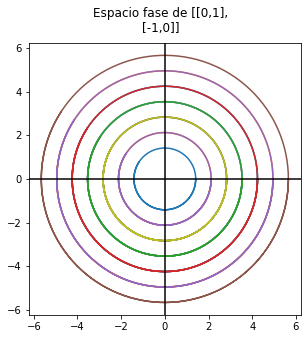

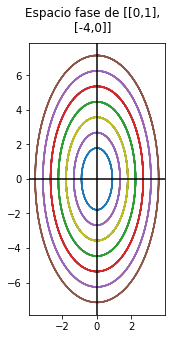

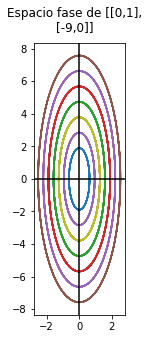

In [ ]:
w0=[1,2,3] # Distintas velocidades angulares iniciales
for w in w0:
  print("Para w0="+str(w)+" se tiene la matriz:")
  A=np.array([[0,1],[-w**2,0]]) # Se define la matriz A
  print('[['+str(A[0,0])+','+str(A[0,1])+'],\n['+str(A[1,0])+','+str(A[1,1])+']]') ##################
  Resolver2x2(A)

## Ejercicio 4.

$$
\frac{d x}{d t}  = -2 x  \\
\frac{d y}{dt }  =  2 z  \\
\frac{d z}{dt }  = - 2 y  \\
$$

In [ ]:
A=np.array([[-2,0,0],[0,0,2],[0,-2,0]]) # Se define la matriz A
Caso(A)

A=
 [[-2  0  0]
 [ 0  0  2]
 [ 0 -2  0]] 

det(A)/q = -8.0
Traza(A)/p = -2
Delta = 36.0
eigvals= [ 0.+2.j  0.-2.j -2.+0.j]
eigvecs= [[ 0.        +0.j          0.        -0.j          1.        +0.j        ]
 [-0.70710678+0.j         -0.70710678-0.j          0.        +0.j        ]
 [ 0.        -0.70710678j  0.        +0.70710678j  0.        +0.j        ]]


<function matplotlib.pyplot.show>

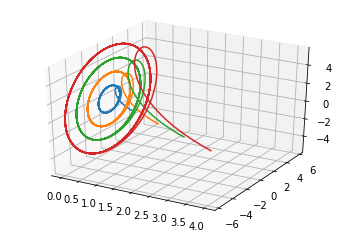

In [ ]:
eigvals, eigvecs = la.eig(A)
t = np.linspace(0, 25,  1000) # Tiempo
c1c2 = np.array([1.,2.,3.,4.]) # c1=c2
B11=eigvecs[:,0].real
B12=eigvecs[:,0].imag
B21=eigvecs[:,1].real
B22=eigvecs[:,1].imag
alpha0=eigvals[0].real
beta0=abs(eigvals[0].imag)
alpha1=eigvals[1].real
beta1=abs(eigvals[1].imag)
B31=eigvecs[:,2].real
va=eigvals[2].real
fig=plt.figure()
ax = plt.axes(projection ='3d')
for k in c1c2:
  tx=[]
  ty=[]
  tz=[]
  for i in t:
      X=(k*(B11*np.cos(beta0*i)-B12*np.sin(beta0*i)))*np.exp(alpha0*i)+(k*(B21*np.cos(beta1*i)+B22*np.sin(beta1*i)))*np.exp(alpha1*i)+k*np.exp(va*i)*B31
      tx.extend([X[0].real])
      ty.extend([X[1].real])
      tz.extend([X[2].real])
  ax.plot3D(tx, ty, tz)
plt.show

## Ejercicio 5.

$$
\frac{d x}{d t} =  - x + z  \\
\frac{d y}{dt } =   3 y  \\
\frac{d z}{dt } =   - x - z \\
$$

In [ ]:
A=np.array([[-1,0,1],[0,3,0],[-1,0,-1]]) # Se define la matriz A
Caso(A)

A=
 [[-1  0  1]
 [ 0  3  0]
 [-1  0 -1]] 

det(A)/q = 6.0
Traza(A)/p = 1
Delta = -23.0
eigvals= [-1.+1.j -1.-1.j  3.+0.j]
eigvecs= [[0.70710678+0.j         0.70710678-0.j         0.        +0.j        ]
 [0.        +0.j         0.        -0.j         1.        +0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j 0.        +0.j        ]]


<function matplotlib.pyplot.show>

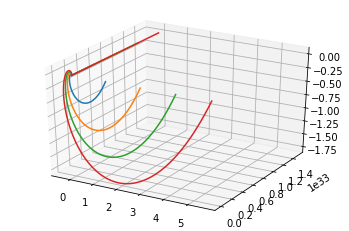

In [ ]:
eigvals, eigvecs = la.eig(A)
t = np.linspace(0, 25,  1000) # Tiempo
c1c2 = np.array([1.,2.,3.,4.]) # c1=c2
B11=eigvecs[:,0].real
B12=eigvecs[:,0].imag
B21=eigvecs[:,1].real
B22=eigvecs[:,1].imag
alpha0=eigvals[0].real
beta0=abs(eigvals[0].imag)
alpha1=eigvals[1].real
beta1=abs(eigvals[1].imag)
B31=eigvecs[:,2].real
va=eigvals[2].real
fig=plt.figure()
ax = plt.axes(projection ='3d')
for k in c1c2:
  tx=[]
  ty=[]
  tz=[]
  for i in t:
      X=(k*(B11*np.cos(beta0*i)-B12*np.sin(beta0*i)))*np.exp(alpha0*i)+(k*(B21*np.cos(beta1*i)+B22*np.sin(beta1*i)))*np.exp(alpha1*i)+k*np.exp(va*i)*B31
      tx.extend([X[0].real])
      ty.extend([X[1].real])
      tz.extend([X[2].real])
  ax.plot3D(tx, ty, tz)
plt.show

# Resuelva los siguientes problemas de valor inicial:

In [ ]:
def eig(Eigvalores,Einvectores):
  print('Eigenvalores')
  print('lambda1= ', eva[0])
  print('lambda2= ', eva[1])
  print(' ')
  print('Eigenvectores')
  print('v1=',eve[0])
  print('v2=',eve[1])

## Ejercicio 6:

$$
\frac{d x}{d t}=- x  \\
\frac{d y}{dt }=x + 2 y  \\
x(0) = 0,\,\,\,\,\,\,\,   y(0) = 3
$$

$$
A=
\begin{bmatrix}
-1 & 0 \\
1 & 2 
\end{bmatrix}
$$

In [ ]:
A=np.array([[-1,0],[1,2]]) # Se define la matriz A
print('A=\n',A,'\n')
X=np.array([[0],[3]]) # Se define la matriz X
print('X=\n',X,'\n')
def dX_dt(X,t=0): # Se define la derivada de la matriz X con respecto a t
    A=np.array([[-1,0],[1,2]])
    return np.array([ A[0,0]*X[0] + A[0,1]*X[1] ,
                  A[1,0]*X[0]+A[1,1]*X[1]])

A=
 [[-1  0]
 [ 1  2]] 

X=
 [[0]
 [3]] 



In [ ]:
# Los puntos críticos del sistema
X_f0 = np.array([0.,0.])
print('Punto crítico del sistema')
print('Punto crítico X_f0:', X_f0)
print(' ')
all(dX_dt(X_f0) == np.zeros(2) )  # Comprobamos que en los puntos ciritos la derivada es 0

Punto crítico del sistema
Punto crítico X_f0: [0. 0.]
 


True

In [ ]:
eva, eve = la.eig(A) # E(igen)va(lor), E(igen)ve(ctor)
eig(eva,eve) # Imprimimos los valores

Eigenvalores
lambda1=  (2+0j)
lambda2=  (-1+0j)
 
Eigenvectores
v1= [0.        0.9486833]
v2= [ 1.         -0.31622777]


In [ ]:
# Solución numérica
t = np.linspace(0, 5,  500)              # Rango de tiempo de integración
X0 = np.array([0, 3])                     # Condiciones iniciales
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']

'Integration successful.'

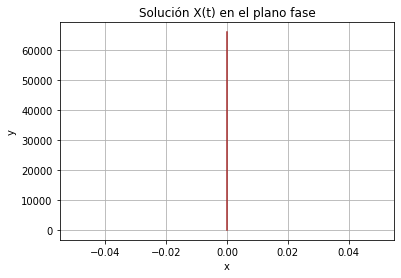

In [ ]:
# Solución en el plano fase
x,y=X.T
plt.plot(x, y, 'brown')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Solución X(t) en el plano fase')
plt.show()

## Ejercicio 7:

$$
\frac{d x}{d t}  =  2 x + y  \\
\frac{d y}{dt }  =   x +  y  \\
x(1) = 1,\,\,\,\,\,\,  y(1) = 1
$$

$$
A=
\begin{bmatrix}
2 & 1 \\
1 & 1 
\end{bmatrix}
$$


In [ ]:
A=np.array([[2,1],[1,1]]) # Se define la matriz A
print('A=\n',A,'\n')
X=np.array([[2],[1]]) # Se define la matriz X
print('X=\n',X,'\n')
def dX_dt(X,t=1): # Se define la derivada de la matriz X con respecto a t
    A=np.array([[2,1],[1,1]])
    return np.array([ A[0,0]*X[0] + A[0,1]*X[1] ,
                  A[1,0]*X[0]+A[1,1]*X[1]])

A=
 [[2 1]
 [1 1]] 

X=
 [[2]
 [1]] 



In [ ]:
# Los puntos críticos del sistema
X_f0 = np.array([0.,0.])
print('Punto crítico del sistema')
print('Punto crítico X_f0:', X_f0)
print(' ')
all(dX_dt(X_f0) == np.zeros(2) )  # Comprobamos que en los puntos ciritos la derivada es 0

Punto crítico del sistema
Punto crítico X_f0: [0. 0.]
 


True

In [ ]:
eva, eve = la.eig(A) # E(igen)va(lor), E(igen)ve(ctor)
eig(eva,eve) # Imprimimos los valores

Eigenvalores
lambda1=  (2.618033988749895+0j)
lambda2=  (0.3819660112501052+0j)
 
Eigenvectores
v1= [ 0.85065081 -0.52573111]
v2= [0.52573111 0.85065081]


In [ ]:
# Solución numérica
t = np.linspace(1, 5,  500)              # Rango de tiempo de integración
X0 = np.array([1, 1])                     # Condiciones iniciales
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']

'Integration successful.'

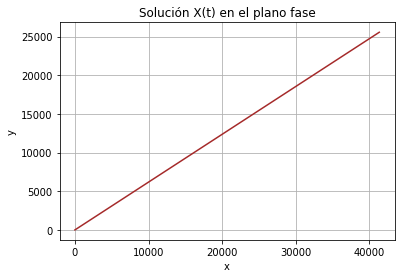

In [ ]:
# Solución en el plano fase
x,y=X.T
plt.plot(x, y, 'brown')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Solución X(t) en el plano fase')
plt.show()

## Ejercicio 8:

$$
\frac{d x}{d t}  =  A x  \\
x(0)  =  (0,3) \\
A  =  \begin{bmatrix}
0 & 3 \\
1 & -2 \\
\end{bmatrix}
$$

In [ ]:
A=np.array([[0,3],[1,-2]]) # Se define la matriz A
print('A=\n',A,'\n')
X=np.array([[0],[3]]) # Se define la matriz X
print('X=\n',X,'\n')
def dX_dt(X,t=1): # Se define la derivada de la matriz X con respecto a t
    A=np.array([[0,3],[1,-2]])
    return np.array([ A[0,0]*X[0] + A[0,1]*X[1] ,
                  A[1,0]*X[0]+A[1,1]*X[1]])

A=
 [[ 0  3]
 [ 1 -2]] 

X=
 [[0]
 [3]] 



In [ ]:
# Los puntos críticos del sistema
X_f0 = np.array([0.,0.])
print('Punto crítico del sistema')
print('Punto crítico X_f0:', X_f0)
print(' ')
all(dX_dt(X_f0) == np.zeros(2) )  # Comprobamos que en los puntos ciritos la derivada es 0

Punto crítico del sistema
Punto crítico X_f0: [0. 0.]
 


True

In [ ]:
eva, eve = la.eig(A) # E(igen)va(lor), E(igen)ve(ctor)
eig(eva,eve) # Imprimimos los valores

Eigenvalores
lambda1=  (1.0000000000000004+0j)
lambda2=  (-3+0j)
 
Eigenvectores
v1= [ 0.9486833  -0.70710678]
v2= [0.31622777 0.70710678]


In [ ]:
# Solución numérica
t = np.linspace(1, 5,  500)              # Rango de tiempo de integración
X0 = np.array([0, 3])                     # Condiciones iniciales
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']

'Integration successful.'

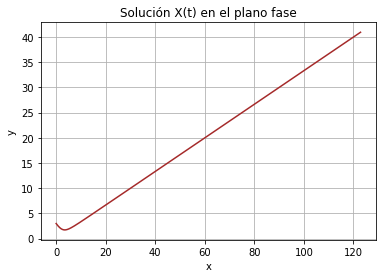

In [ ]:
# Solución en el plano fase
x,y=X.T
plt.plot(x, y, 'brown')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.title('Solución X(t) en el plano fase')
plt.show()

## Ejercicio 9:
$$\frac{d x}{d t}=Ax$$
$$x(0)=(0,-b,b)$$
$$A =\begin{bmatrix}
2 & 0 & 0 \\
0 & -1 & 0 \\
0 & 2 & -3 \\
\end{bmatrix}$$

In [ ]:
A=np.array([[2,0,0],[0,-1,0],[0,2,-3]]) # Se define la matriz A
print('A=\n',A,'\n')
def dX_dt(X,t=0): # Se define la derivada de la matriz X con respecto a t
    A=np.array([[2,0,0],[0,-1,0],[0,2,-3]])
    return np.array([ A[0,0]*X[0] + A[0,1]*X[1]+ A[0,2]*X[2] ,
                  A[1,0]*X[0]+A[1,1]*X[1]+ A[1,2]*X[2],
                  A[2,0]*X[0]+A[2,1]*X[1]+ A[2,2]*X[2]])

A=
 [[ 2  0  0]
 [ 0 -1  0]
 [ 0  2 -3]] 



In [ ]:
# Los puntos críticos del sistema
X_f0 = np.array([0.,0.,0.])
print('Punto crítico del sistema')
print('Punto crítico X_f0:', X_f0)
print(' ')
all(dX_dt(X_f0) == np.zeros(3) )  # Comprobamos que en los puntos ciritos la derivada es 0

Punto crítico del sistema
Punto crítico X_f0: [0. 0. 0.]
 


True

In [ ]:
eva, eve = la.eig(A) # E(igen)va(lor), E(igen)ve(ctor)
eig(eva,eve) # Imprimimos los valores

Eigenvalores
lambda1=  (2+0j)
lambda2=  (-3+0j)
 
Eigenvectores
v1= [1. 0. 0.]
v2= [0.         0.         0.70710678]


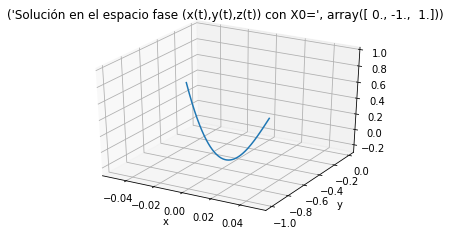

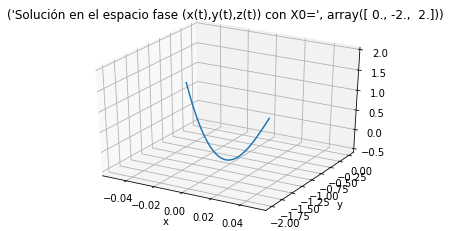

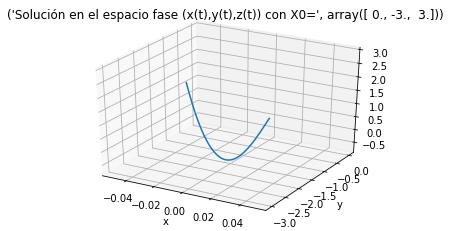

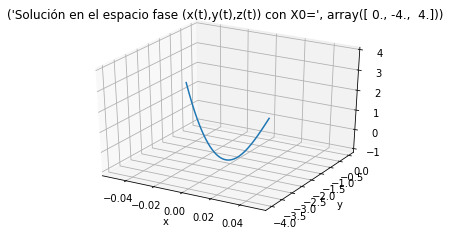

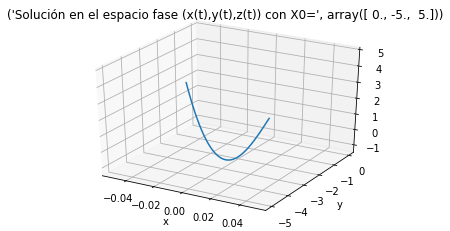

In [ ]:
# Solución numérica
t = np.linspace(0, 5,  500)              # Rango de tiempo de integración

for b in [1,2,3,4,5]:
  X0 =np.array([0.,-b,b]) # Condiciones iniciales
  X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
  infodict['message']
  fig = plt.figure()
  # syntax for 3-D projection
  ax = plt.axes(projection ='3d')
  plt.xlabel('x');
  plt.ylabel('y');
  # defining all 3 axes
  x, y, z = X.T
  # plotting
  ax.plot3D(x, y, z)
  ax.set_title(('Solución en el espacio fase (x(t),y(t),z(t)) con X0=',X0))
  plt.show()

# Ejercicio 10:

Se tiene el siguiente sistema de resortes acoplados con dos masas.

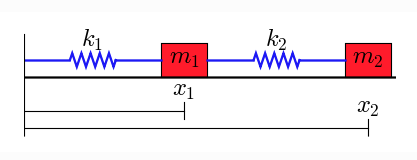

El sistema esta sujeto del primer resorte de la izquierda. Cuando el sistema se deja en reposo, las longitudes de los resortes son $L_1$ y $L_2$.

Las ecuaciones de movimiento estan dadas por las siguientes ecuaciones diferenciales acopladas:

$$\begin{eqnarray*}
m_1 x_1^{''} + b_1 x_1^{'}+k_1 (x_1-L_1)-k_2(x_2-x_1-L_2) & = & 0 \\
m_2 x_2^{''} + b_2 x_2^{'}+k_2(x_2-x_1-L_2) & = & 0 \\
\end{eqnarray*}$$
Encuentre las soluciones como funciones de $t$ y grafíquelas, así como las trayectorias en el espacio fase.

Suponga que $L_1=L_2=1$ y que las masas son iguales $m_1=m_2=1$.

$$\begin{eqnarray*}
(1)x_1^{''} + b_1 x_1^{'}+k_1 (x_1-1)-k_2(x_2-x_1-1) & = & 0 \\
(1) x_2^{''} + b_2 x_2^{'}+k_2(x_2-x_1-1) & = & 0 \\
\end{eqnarray*}$$
\\
$$\begin{eqnarray*}
x_1^{''} + b_1 x_1^{'} + k_1x_1-k_2(x_2-x_1)-k_1+k_2 & = & 0 \\
x_2^{''} + b_2 x_2^{'} + k_2(x_2-x_1)-k_2 & = & 0 \\
\end{eqnarray*}$$
\\
$$\begin{eqnarray*}
x_1^{''}  & = & - b_1 x_1^{'} - k_1x_1-k_2(x_2-x_1)+k_1-k_2 \\
x_2^{''}  & = & - b_2 x_2^{'} - k_2(x_2-x_1)+k_2 \\
\end{eqnarray*}$$
\\
$$x_1'=x_3,x_2'=x_4$$
\\
$$\frac{dx}{dt}=x_3$$
$$\frac{dx_3}{dt}=- b_1 x_3 +(-k_1+k_2)x_1-k_2x_2+(k_1-k_2)$$
$$\frac{dx_2}{dt}=x_4$$
$$x_4=- b_2 x_4 - k_2x_2+k_2x_1+k_2$$

$$\begin{eqnarray*}
\frac{d\vec{x}}{dt}=\frac{d}{dt}
\begin{bmatrix}
x_1\\
x_3\\
x_2\\
x_4\\
\end{bmatrix} = & \begin{bmatrix}
0 & 1 & 0 & 0\\
-k_1+k_2 & -b_1 & -k_2 & k_1-k_2\\
0 & 0 & 0 & 1\\
k_2 & 0 & -k_2 & -b_2\\
\end{bmatrix}\begin{bmatrix}
x_1\\
x_3\\
x_2\\
x_4\\
\end{bmatrix}+\begin{bmatrix}
0\\
k_1-k_2\\
0 \\
k_2 \\
\end{bmatrix}
\end{eqnarray*}$$


## 10.1) 
Encuentre los eigenvalores del sistema y diga como son las soluciones.

Tenemos la matriz:
$$
\begin{bmatrix}
0-\lambda & 1 & 0 & 0\\
-k_1+k_2 & -b_1-\lambda & -k_2 & k_1-k_2\\
0 & 0 & 0-\lambda & 1\\
k_2 & 0 & -k_2 & -b_2-\lambda\\
\end{bmatrix}
$$
cuyo determinante es:
$$det=\lambda^3b_2+\lambda k_1b_2-\lambda k_2 b_2+\lambda^2b_1b_2+\lambda^4+\lambda^2k_1+\lambda k_2^2+k_1 k_2-\lambda k_1 k_2+\lambda k_2 b_1+\lambda^3 b_1 $$
\\
$$det=\lambda^4+(b_1+b_2)\lambda^3+(k_1+b_1b_2)\lambda^2+\lambda(k_1b_2-k_2 b_2+k_2^2-k_1 k_2+ k_2 b_1) +k_1 k_2 $$
\\
$$det=\lambda^4+(b_1+b_2)\lambda^3+(k_1+b_1b_2)\lambda^2+\lambda(k_1b_2+k_2(-b_2+k_2-k_1+b_1) ) +k_1 k_2 $$


Siendo asi los eigenvalores del sistema las soluciones al sistema:
$$\boldsymbol{\lambda^4+(b_1+b_2)\lambda^3+(k_1+b_1b_2)\lambda^2+\lambda(k_1b_2+k_2(-b_2+k_2-k_1+b_1) ) +k_1 k_2=0}$$
Siendo $k_1,k_2,b_1,b_2$ constantes del sistema especifico a estudiar.

## 10.2) 
Caso sin fricción. $b_1=b_2=0$, $k_1=6$, $k_2=4$, condiciones iniciales $(x_1(0), x_1^{'}(0), x_2(0), x_2^{'}(0))=(1,0,4,0)$

In [351]:
# Constantes
k1=6.
k2=4.
b1=0.
b2=b1
X=np.array([[0,1,0,0],[-k1-k2,-b1,k2,0],[0,0,0,1],[k2,0,-1*k2,-1*b2]]) # Matriz de derivada
print('La matriz en cuestion es ')
print(X)
print()
C=np.array([[0],[2],[0],[4]])
def dX_dt(X,t=0):
  return np.array([X[1], 
                   (-k1-k2)*X[0] -b1*X[1] +k2*X[2],  
                   X[3],   
                   -k2*X[2]+k2*X[0]])
X_f0=np.array([0.0  , 0.0  , 0.0  , 0.0  ]) # Puntos criticos 
X0=np.array([1.0  , 0.0  ,4.0  , 0.0  ]) # Condiciones iniciales
print('Puntos criticos del sistema para los valores dados')
print('X_f0=   ',X_f0)
print(all(dX_dt(X_f0) == np.zeros(4) )) # Verificamos la derivada en 0
C_sol=la.solve(X,-C)
print(C_sol)
#Solucion
t=np.linspace(0,50,1000)
X,infodict=integrate.odeint(dX_dt,X0,t,full_output=True)
infodict['message']

La matriz en cuestion es 
[[  0.   1.   0.   0.]
 [-10.  -0.   4.   0.]
 [  0.   0.   0.   1.]
 [  4.   0.  -4.  -0.]]

Puntos criticos del sistema para los valores dados
X_f0=    [0. 0. 0. 0.]
True
[[1.]
 [0.]
 [2.]
 [0.]]


'Integration successful.'

<Figure size 432x288 with 0 Axes>

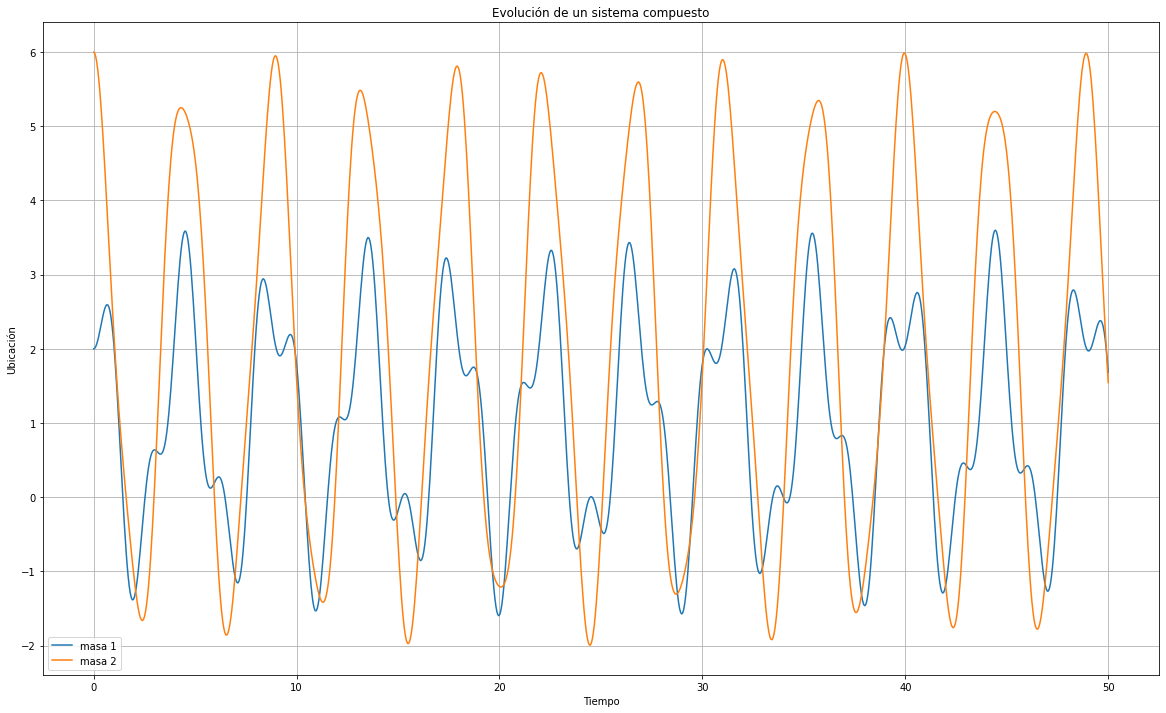

In [352]:
x1, x3, x2, x4 =X.T+C_sol
f1 = plt.figure();
plt.figure(figsize=(20, 12)); 
plt.plot(t, x1, label='masa 1');
plt.plot(t, x2, label='masa 2');
plt.grid();
plt.legend(loc='best');
plt.xlabel('Tiempo');
plt.ylabel('Ubicación');
plt.title('Evolución de un sistema compuesto');
plt.show();

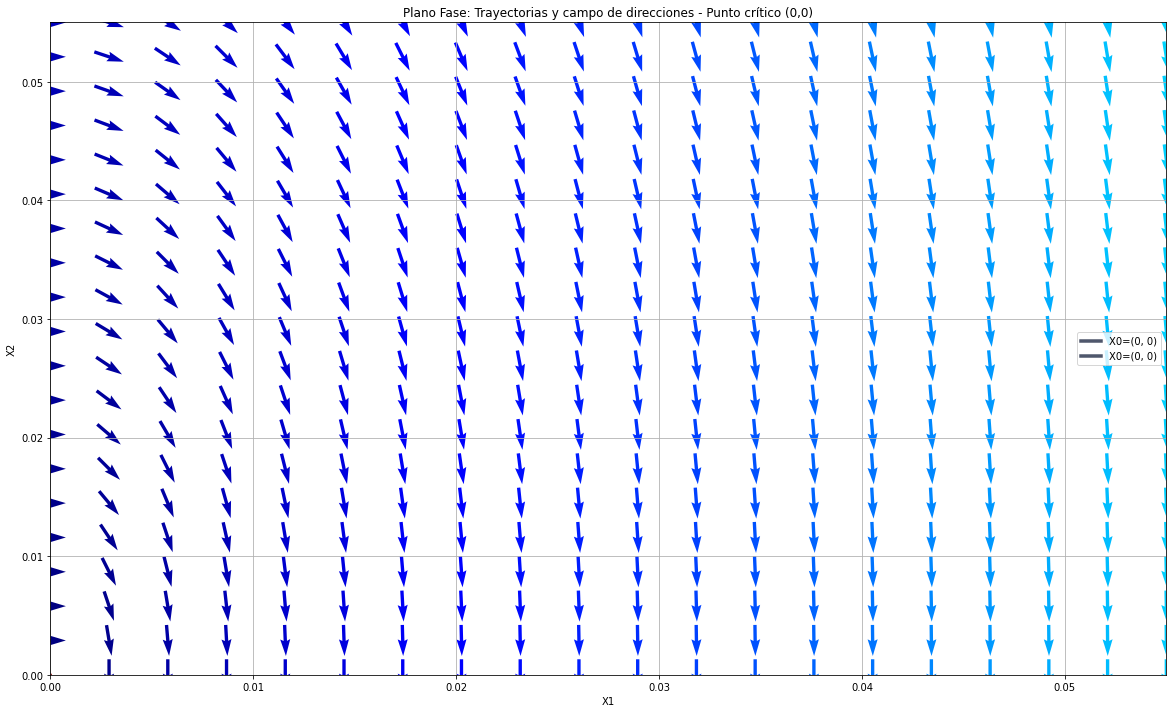

In [353]:
values  = np.linspace(1, 10, 1) # posición de X0 entre X_f0 y X_f1
vcolors = plt.cm.cividis(np.linspace(0.3, 1., len(values))) # colores para cada trayectoria
plt.figure(figsize=(20, 12)); 

# grafica las trayectorias
#-------------------------------------------------------
for v, col in zip(values, vcolors):
    X0 = v * X_f0                             
    # punto inicial
    X = integrate.odeint( dX_dt, X0, t)         
    # Integración para cada condición inicial
    plt.plot( X[:,0], X[:,2], lw=3.5*v, color=col,
             label='X0=(%.f, %.f)' % ( X0[0], X0[2]) )
ymax = plt.ylim(ymin=0)[1]
xmax = plt.xlim(xmin=0)[1]

for v, col in zip(values, vcolors):
    X0 = v * X_f0                             
    # punto inicial
    X = integrate.odeint( dX_dt, X0, t)         
    # Integración para cada condición inicial
    plt.plot( X[:,1], X[:,3], lw=3.5*v, color=col,
             label='X0=(%.f, %.f)' % ( X0[1], X0[3]) )
y2max= plt.ylim(ymin=0)[1]
x2max= plt.xlim(xmin=0)[1]

# define una malla y calcula la pendiente (dirección) en cada punto
#-------------------------------------------------------
nb_points   = 20
x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)
x2 = np.linspace(0, x2max, nb_points)
y2 = np.linspace(0, y2max, nb_points)

#Mallas
X1 , Y1 = np.meshgrid(x, y)     
X2 , Y2 = np.meshgrid(x2, y2)                  
# Tasa de crecimiento
DX1, DY1, DX2, DY2 = dX_dt([X1, Y1, X2  , Y2]) 
M = (np.hypot(DX1, DY1))  # distancia euclideana 
M[ M == 0] = 1.           # Evita divisiones entre 0 
DX1 /= M                  # Normaliza el tamaño de cada flecha
DY1 /= M                  # Normaliza el tamaño de cada flecha
# Dibujar los campos de direcciones usando la función quiver de Matplotlib 
# EL color de las flechas indica la rapidez de crecimiento
#-------------------------------------------------------
plt.title('Plano Fase: Trayectorias y campo de direcciones - Punto crítico (0,0)')
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.jet)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='best')
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.show()

## 10.3) 
Igual que el caso anterior pero, con fricción: $b_1=0.1, b_2=0.2$

In [348]:
#La parte homogenea
#Condiciones iniciales
k2=4
k1=6
b1=0.1
b2=0.2
X=np.array([[0,1,0,0],[-1*(k2+k1),-1*b1,k2,0],[0,0,0,1],[k2,0,-1*k2,-1*b2]])
print('La matriz en cuestion es ')
print(X)
print()
C=np.array([[0],[2],[0],[4]])
def dX_dt(X,t=0):
  return np.array([X[1] , -1*(k2+k1)*X[0] -1*b1*X[1] +k2*X[2]  ,  
                   X[3]  ,   -1*k2*X[2]+k2*X[0]])
X_f0=np.array([0.0  , 0.0  , 0.0  , 0.0  ]) # Puntos criticos 
X0=np.array([1.0  , 0.0  ,4.0  , 0.0  ]) # Condiciones iniciales
print('Puntos criticos del sistema para los valores dados')
print('X_f0=   ',X_f0)
print(all(dX_dt(X_f0) == np.zeros(4) )) # Verificamos la derivada en 0
C_sol=la.solve(X,-C)
print(C_sol)
#Solucion
t=np.linspace(0,50,1000)
X,infodict=integrate.odeint(dX_dt,X0,t,full_output=True)
infodict['message']

La matriz en cuestion es 
[[  0.    1.    0.    0. ]
 [-10.   -0.1   4.    0. ]
 [  0.    0.    0.    1. ]
 [  4.    0.   -4.   -0.2]]

Puntos criticos del sistema para los valores dados
X_f0=    [0. 0. 0. 0.]
True
[[1.]
 [0.]
 [2.]
 [0.]]


'Integration successful.'

<Figure size 432x288 with 0 Axes>

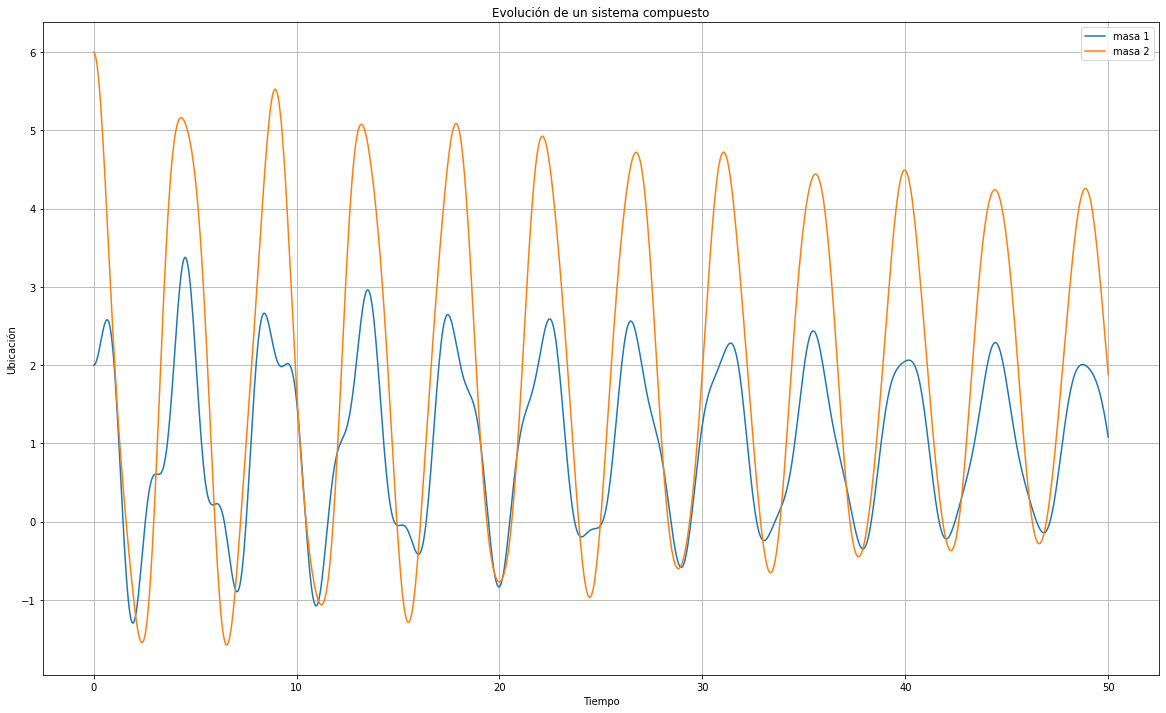

In [349]:
x1, x3, x2, x4 =X.T+C_sol
f1 = plt.figure();
plt.figure(figsize=(20, 12)); 
plt.plot(t, x1, label='masa 1');
plt.plot(t, x2, label='masa 2');
plt.grid();
plt.legend(loc='best');
plt.xlabel('Tiempo');
plt.ylabel('Ubicación');
plt.title('Evolución de un sistema compuesto');
plt.show();

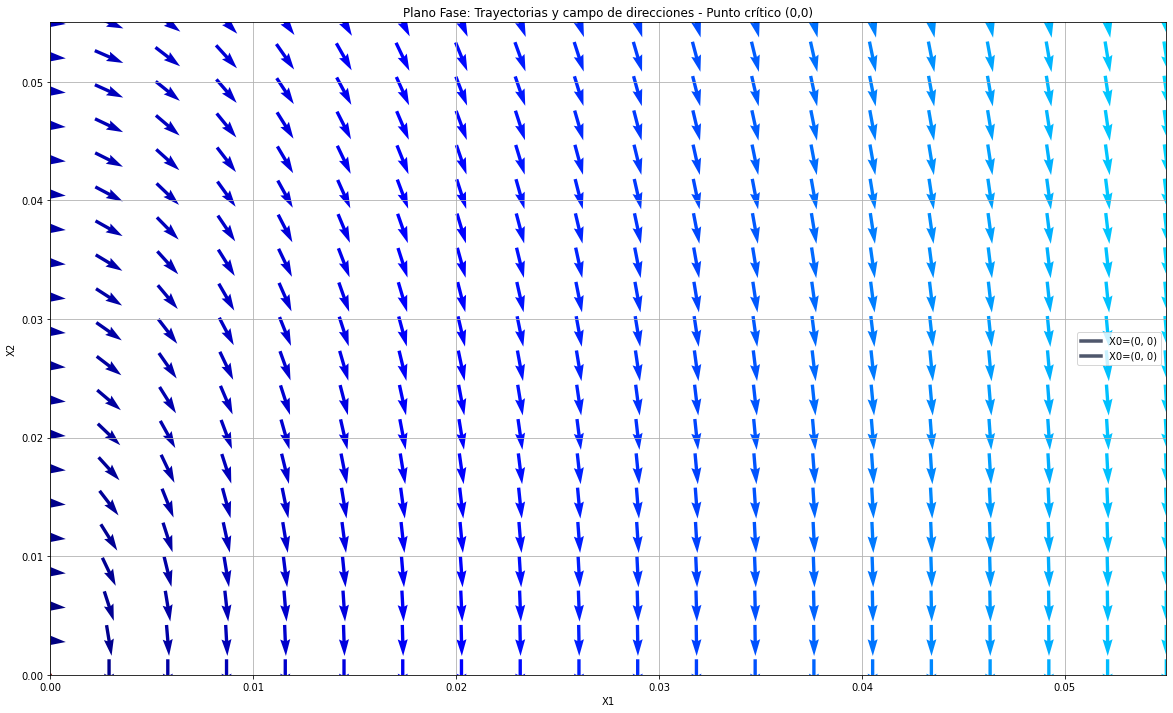

In [350]:
#Malla
values  = np.linspace(1, 10, 1) # posición de X0 entre X_f0 y X_f1
vcolors = plt.cm.cividis(np.linspace(0.3, 1., len(values))) # colores para cada trayectoria
plt.figure(figsize=(20, 12)); 
# Grafica las trayectorias
#-------------------------------------------------------
for v, col in zip(values, vcolors):
    X0 = v * X_f0                             
    # punto inicial
    X = integrate.odeint( dX_dt, X0, t)         
    # Integración para cada condición inicial
    plt.plot( X[:,0], X[:,2], lw=3.5*v, color=col,
             label='X0=(%.f, %.f)' % ( X0[0], X0[2]) )
ymax = plt.ylim(ymin=0)[1]                        # get axis limits
xmax = plt.xlim(xmin=0)[1]

for v, col in zip(values, vcolors):
    X0 = v * X_f0                             
    # punto inicial
    X = integrate.odeint( dX_dt, X0, t)         
    # Integración para cada condición inicial
    plt.plot( X[:,1], X[:,3], lw=3.5*v, color=col,
             label='X0=(%.f, %.f)' % ( X0[1], X0[3]) )
y2max= plt.ylim(ymin=0)[1]   
x2max= plt.xlim(xmin=0)[1] 
# Define una malla y calcula la pendiente (dirección) en cada punto
#-------------------------------------------------------
nb_points   = 20
x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)
x2 = np.linspace(0, x2max, nb_points)
y2 = np.linspace(0, y2max, nb_points)

X1 , Y1 = np.meshgrid(x, y)     
X2 , Y2 = np.meshgrid(x2, y2)                   # Crea la malla
DX1, DY1, DX2, DY2 = dX_dt([X1, Y1, X2  , Y2])  # Calcula la tasa de crecimiento 
M = (np.hypot(DX1, DY1))  # Distancia euclideana 
M[ M == 0] = 1.           # Evita divisiones entre 0 
DX1 /= M                  # Normaliza el tamaño de cada flecha
DY1 /= M                  # Normaliza el tamaño de cada flecha
# Dibujar los campos de direcciones usando la función quiver de Matplotlib 
# El color de las flechas indica la rapidez de crecimiento
#-------------------------------------------------------
plt.title('Plano Fase: Trayectorias y campo de direcciones - Punto crítico (0,0)')
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.jet)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='best')
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.show()